In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as model

In [2]:
from helper import boston_dataframe

In [3]:
from sklearn.datasets import load_boston

In [4]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = load_boston()
names = list(boston.feature_names)
names.append('MV')
data = np.concatenate([boston.data,boston.target[:,np.newaxis]],axis=1)
df = pd.DataFrame(data, columns=names)

In [6]:
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
import sklearn.linear_model as Lmodel
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

In [8]:
pol = PolynomialFeatures(2,include_bias=False)

In [9]:
tr_data = pol.fit_transform(boston.data)

In [10]:
scaler  = StandardScaler()
tr_data = scaler.fit_transform(tr_data)

In [11]:
tr_target_box_cox, lam = boxcox(boston.target)

In [13]:
 x_train, x_test, y_train, y_test = train_test_split(tr_data,tr_target_box_cox, random_state=56, test_size=0.3)

In [24]:
scaler_y = StandardScaler()
scaler_y.fit(y_train.reshape(-1,1))
y_train_scaled = scaler_y.transform(y_train.reshape(len(y_train[:]),1))
y_test_scaled = scaler_y.transform(y_test.reshape(len(y_test[:]),1))


In [26]:
model = Lmodel.LinearRegression()

In [28]:
model.fit(x_train, y_train_scaled[:,0])

LinearRegression()

(array([ 0.,  3., 12., 24., 67., 20., 14.,  5.,  6.]),
 array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ]),
 <BarContainer object of 9 artists>)

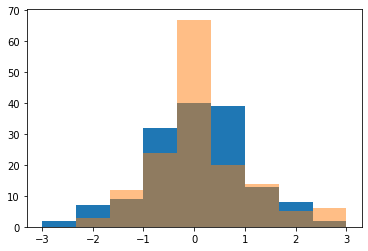

In [30]:
plt.hist(model.predict(x_test), bins=np.linspace(-3,3,10))
plt.hist(y_test_scaled[:,0], alpha=0.5, bins=np.linspace(-3,3,10))

In [32]:
r2(y_test_scaled[:,0], model.predict(x_test))

0.7804390760872666

## Now without the boxcox transformation

In [33]:
from scipy.special import inv_boxcox

In [36]:
y_train = inv_boxcox(y_train,lam)
y_test = inv_boxcox(y_test,lam)

In [37]:
scaler_y = StandardScaler()
scaler_y.fit(y_train.reshape(-1,1))
y_train_scaled = scaler_y.transform(y_train.reshape(len(y_train[:]),1))
y_test_scaled = scaler_y.transform(y_test.reshape(len(y_test[:]),1))

(array([ 0.,  1., 12., 35., 69., 10., 12.,  3.,  4.]),
 array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
         0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ]),
 <BarContainer object of 9 artists>)

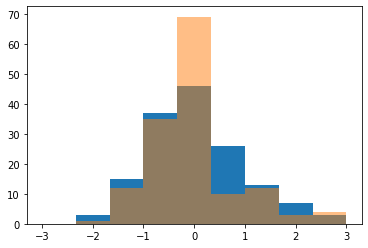

In [38]:
model.fit(x_train, y_train_scaled[:,0])
plt.hist(model.predict(x_test), bins=np.linspace(-3,3,10))
plt.hist(y_test_scaled[:,0], alpha=0.5, bins=np.linspace(-3,3,10))

In [39]:
r2(y_test_scaled[:,0], model.predict(x_test))

0.8199501844121135